## Member Retention, A Fresh Look
By: Scott Schmidl, Data Scientist
11/29/2021

### Goal
The goal of this project is to understand the attributes that lead to customer churn and identify and recommend way to help reduce churn.

### Description
It has come to the attention of staff here at Telco that members are churning at a rapid rate. We will identify attributes that do  or do not lead to churn, develop a model to best predict if a customer will churn based off of their information, and make recommendations to help with future memeber retention.

### Initial Questions
1) Is it the case that those with higher monthly charges churn more often than those with lower monthly charges?
2) How much are people paying per month per contract type and does that lead to higher churn?
3) How do the costs for each internet type affect monthly charges and how does that affect churn?
4) How does offering paperless billing affect monthly charges and does that cost affect churn?

### Data Dictionary
<table>
<thead><tr>
<th>Variable</th>
<th>Meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td>churn</td>
<td>yes or no</td>
</tr>
<tr>
<td>gender</td>
<td>male or female</td>
</tr>
<tr>
<td>senior citizen</td>
<td>yes or no</td>
</tr>
<tr>
<td>partner</td>
<td>yes or no </td>
</tr>
<tr>
<td>dependents</td>
<td>yes or no </td>
</tr>
<tr>
<td>tenure</td>
<td>How many months a customer has been with company</td>
</tr>
<tr>
<td>phone service</td>
<td>yes or no</td>
</tr>
<tr>
<td>paperless_billing</td>
<td>yes or no</td>
</tr>
<tr>
<td>monthly_charges</td>
<td> amount customer spends per month for our services</td>
</tr>
<tr>
<td>total_charges</td>
<td>total amount a customer has spent over their tenure</td>
</tr>
<tr>
<td>contract type</td>
<td>two year, one year, or month-to-month </td>
</tr>
<tr>
<td>internet service type</td>
<td>fiber optic, dsl or no service</td>
</tr>
<tr>
<td>payment_type</td>
<td>mailed check, electronic check, credit card (automatic), bank transfer (automatic)</td>
</tr>
<tr>
<td>no_phone_service</td>
<td>they do not have a phone service or they do</td>
</tr>
<tr>
<td>multiple_lines</td>
<td>yes or no </td>
</tr>
<tr>
<td>online_security</td>
<td>yes or no </td>
</tr>
<tr>
<td>online_backup</td>
<td>yes or no </td>
</tr>
<tr>
<td>device_protectio</td>
<td>yes or no </td>
</tr>
<tr>
<td>tech_support</td>
<td>yes or no </td>
</tr>
<tr>
<td>streaming_tv</td>
<td>yes or no </td>
</tr>
<tr>
<td>steaming_movies</td>
<td>yes or no </td>
</tr>
</tbody>
</table>

### Acquire Telco

To acquire the telco data, I used the telco_churn database in our mySQL server, and selected all columns from the customers, contract_types, internet_service_types, and payment_types tables. Please see acquire.py for query info.

In [1]:
# import Acquire module
from acquire import Acquire

# Instantiate Acquire class and pull in data from csv or MySQL
a = Acquire()
telco = a.get_telco_data()

To clean the data I did the following:
- Dropped columns that I felt provided no useful information or were redundant
- Replaced binary columns with 1's and 0's
- Checked if I was doing machine learning and if so encoded string type columns
- Created dummy columns
- Rename columns for readability

In [3]:
# import prepare and pandas module
from prepare import Prepare
import pandas as pd

# set max columns to more easily viewed desired columns
pd.options.display.max_columns = 30

# instaniate Prepare class and prep data
p = Prepare()
train, validate, test = p.prep_telco(telco)

- Our data is now split for exploring and machine learning.
- Validate is used to verify that our models are not overfit.
- The test set is estimate future model performance.

### Set The Scene
23.54% of our customers have churned. We have data from 7043 customers, 55% have month-to-month contracts, 44% have Fiber Optic internet, and 59.2% have paperless billing.

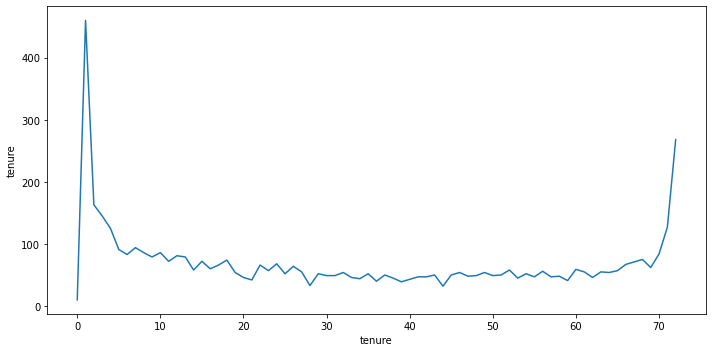

In [7]:
# import seasborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# plot of tenure months and frequence to vizualize our churn
_ = plt.figure(figsize=(10, 5))
ax = sns.lineplot(x=train.groupby(by="tenure")["tenure"].count().index, y=train.groupby(by="tenure")["tenure"].count())
plt.tight_layout();

### Exploratory Analysis
- I have answered these questions:

#### Question 1
- Is it the case that those with higher monthly charges churn more often than those with lower monthly charges?

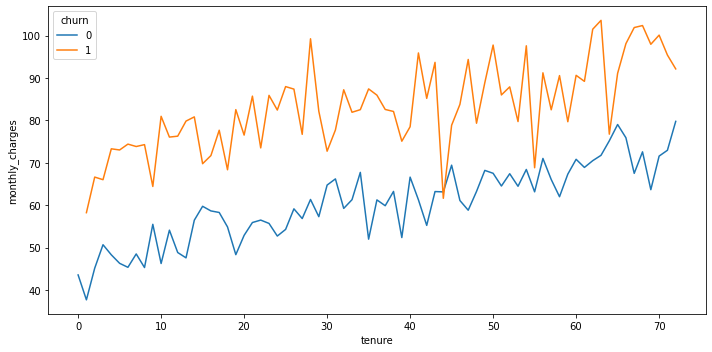

In [8]:
_ = plt.figure(figsize=(10, 5))
sns.lineplot(x="tenure", y="monthly_charges", data=train, hue="churn", ci=None)
plt.tight_layout();

#### Answer 1
Yes, those with high monthly charges have churned compared to those with lower monthly charges



#### Question 2
- How much are people paying per month per contract type and does that lead to higher churn?



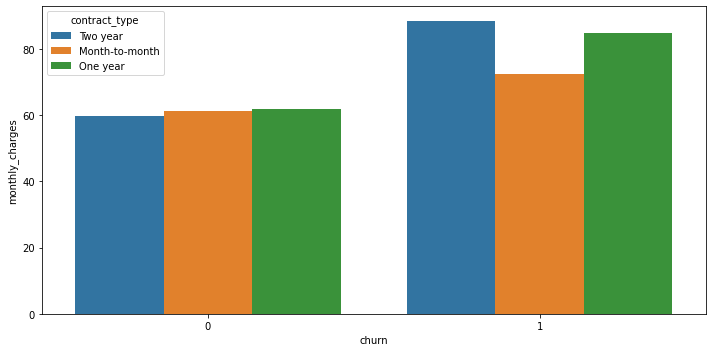

In [13]:
# Import scipy.stats for statistical modeling
from scipy import stats
_ = plt.figure(figsize=(10, 5))
sns.barplot(x="churn", y="monthly_charges", data=train, hue="contract_type", ci=None)
plt.tight_layout();
m2m = pd.DataFrame([[1192, 159], [1607, 2130]], index=["churn", "no_churn"], columns=["m2m", "not_m2m"])
m2m_t, m2m2_p, m2m_dof, m2m_expected = stats.chi2_contingency(m2m)

#### Answer 2



#### Question 3
- How do the costs for each internet type affect monthly charges and how does that affect churn?



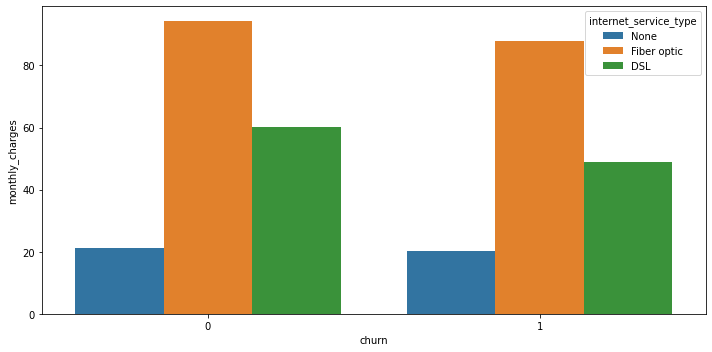

In [14]:
_ = plt.figure(figsize=(10, 5))
sns.barplot(x="churn", y="monthly_charges", data=train, ci=None, hue="internet_service_type")
plt.tight_layout();
fiber = pd.DataFrame([[932, 419], [1261, 2476]], index=["churn", "no_churn"], columns=["fiber", "not_fiber"])
fiber_t, fiber_p, fiber_dof, fiber_expected = stats.chi2_contingency(fiber)

#### Answer 3



#### Question 4
- How does offering paperless billing affect monthly charges and does that cost affect churn?



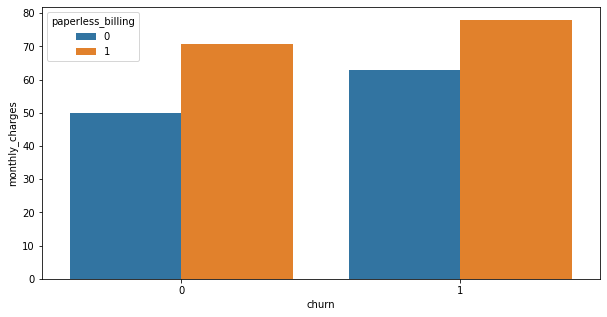

In [15]:
_ = plt.figure(figsize=(10, 5))
sns.barplot(x="churn", y="monthly_charges", data=train, ci=None, hue="paperless_billing");
paperless = pd.DataFrame([[997, 354], [1979, 1758]], index=["churn", "no_churn"], columns=["paperless", "not_paperless"])
paperless_t, paperless_p, paperless_dof, paperless_expected = stats.chi2_contingency(paperless)

#### Answer 4



### Summary
- Cost of services appears to be a driving factor in those that churn
- Those that churn with each contract type are paying more than those that churn
- Those that churn with each internet type are slightly less than those that do not churn. Those that do not churn are also paying more.
- Those that churn with paperless or not paperless are paying more money than those that do not churn 


### Baseline

### Fit 3 Models

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

### Conclusion


#### Summary


#### Recommendations


#### Next Steps